In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow.python import train
# Load the real and fake galaxy images from the directories
train_dir = '/content/drive/MyDrive/Group_Project_Data/Train'
test_dir = '/content/drive/MyDrive/Group_Project_Data/Valid'


train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64, 64), batch_size=128, class_mode='binary',color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(64, 64), batch_size=128, class_mode='binary',color_mode='grayscale')
#train images are loaded
x_train=[]
y_train=[]

for i in range(len(train_generator)):
  batch_x,batch_y=next(train_generator)
  x_train.append(batch_x)
  y_train.append(batch_y)

x_train=np.concatenate(x_train,axis=0)
y_train=np.concatenate(y_train,axis=0)
#test images are loaded
x_test=[]
y_test=[]

for i in range(len(test_generator)):
  batch_x,batch_y=next(test_generator)
  x_test.append(batch_x)
  y_test.append(batch_y)
x_test=np.concatenate(x_test,axis=0)
y_test=np.concatenate(y_test,axis=0)



(64, 64, 1)


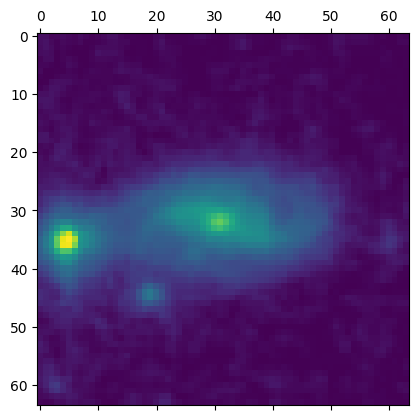

In [12]:
print(x_train[0].shape)
plt.matshow(x_train[0])

In [13]:
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout


model = Sequential()

# Input layer
model.add(InputLayer(input_shape=(64, 64, 1)))

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))

# Dropout layer
model.add(Dropout(0.25))

# Dense layer 2
model.add(Dense(units=64, activation='relu'))

# Dropout layer
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:

# Train the model
history = model.fit(x_train, y_train,batch_size=128,epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
47/47 [==============================] - 13s 30ms/step - loss: 0.7632 - accuracy: 0.5063 - val_loss: 0.6917 - val_accuracy: 0.4975
Epoch 2/25
47/47 [==============================] - 1s 15ms/step - loss: 0.3767 - accuracy: 0.8308 - val_loss: 0.0791 - val_accuracy: 0.9805
Epoch 3/25
47/47 [==============================] - 1s 17ms/step - loss: 0.0827 - accuracy: 0.9783 - val_loss: 0.0333 - val_accuracy: 0.9940
Epoch 4/25
47/47 [==============================] - 1s 17ms/step - loss: 0.0343 - accuracy: 0.9928 - val_loss: 0.0273 - val_accuracy: 0.9955
Epoch 5/25
47/47 [==============================] - 1s 15ms/step - loss: 0.0211 - accuracy: 0.9965 - val_loss: 0.0227 - val_accuracy: 0.9975
Epoch 6/25
47/47 [==============================] - 1s 15ms/step - loss: 0.0179 - accuracy: 0.9973 - val_loss: 0.0202 - val_accuracy: 0.9960
Epoch 7/25
47/47 [==============================] - 1s 16ms/step - loss: 0.0320 - accuracy: 0.9940 - val_loss: 0.1204 - val_accuracy: 0.9790
Epoch 8/25
4

In [1]:
# Make predictions on new images
#new_image = cv2.imread('/content/drive/MyDrive/Documents/Group_Project_Data/Train/Fake/img_567.png')
#print(new_image.shape)
#new_image = cv2.resize(new_image, (64, 64))
#new_image = np.array([new_image])
plt.matshow(x_test[0])

prediction = model.predict(x_test[0])
print(prediction)
if(prediction>.60):
  print('label 1')
  print('image is real')
else:
  print('label 0')
  print('image is fake')



NameError: ignored